In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')
%matplotlib inline

### One patient

In [2]:
datadir='/nagyvinyok/adat84/sotejedlik/ribli/expression/data/brca_rnaseq/'
datadir+='RNASeqV2/UNC__IlluminaHiSeq_RNASeqV2/Level_3/'

data=pd.read_csv(
    datadir+'unc.edu.ffd6c7c5-d4c4-4ead-9e55-de8f6aa62182.2247564.junction_quantification.txt',
    sep='\t',header=0)

data.head()

,junction,raw_counts
0,"chr1:12227:+,chr1:12595:+",0
1,"chr1:12227:+,chr1:12613:+",0
2,"chr1:12227:+,chr1:12646:+",0
3,"chr1:12697:+,chr1:13221:+",0
4,"chr1:12721:+,chr1:13221:+",0


In [3]:
data['chr1']=[x.split(',')[0].split(':')[0] for x in data.junction]
data['chr2']=[x.split(',')[1].split(':')[0] for x in data.junction]

data['pos1']=[int(x.split(',')[0].split(':')[1]) for x in data.junction]
data['pos2']=[int(x.split(',')[1].split(':')[1]) for x in data.junction]

data['strand1']=[x.split(',')[0].split(':')[2] for x in data.junction]
data['strand2']=[x.split(',')[1].split(':')[2] for x in data.junction]


data=data[data.chr1==data.chr2]
data['chr']=data.chr1
data.drop(['chr1','chr2'],axis=1,inplace=True)

data=data[data.strand1==data.strand2]
data['strand']=data.strand1
data.drop(['strand1','strand2'],axis=1,inplace=True)

data.drop('junction',axis=1,inplace=True)

data.head()

,raw_counts,pos1,pos2,chr,strand
0,0,12227,12595,chr1,+
1,0,12227,12613,chr1,+
2,0,12227,12646,chr1,+
3,0,12697,13221,chr1,+
4,0,12721,13221,chr1,+


### Select cassette like triplets

In [5]:
jctrip=pd.concat([data[:-2],data[1:-1].reset_index(drop=True),data[2:].reset_index(drop=True)],axis=1,ignore_index=True)

cass=jctrip[ (jctrip[1]==jctrip[6]) & (jctrip[7]==jctrip[12]) ].reset_index(drop=True)

cass.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,278,14829,14970,chr1,-,0,14829,15796,chr1,-,0,15038,15796,chr1,-
1,0,17055,17259,chr1,-,12,17055,17606,chr1,-,64,17368,17606,chr1,-
2,64,17368,17606,chr1,-,0,17368,17915,chr1,-,137,17742,17915,chr1,-
3,13,787490,788051,chr1,+,1,787490,788771,chr1,+,25,788146,788771,chr1,+
4,6,908390,908566,chr1,+,0,908390,908880,chr1,+,9,908706,908880,chr1,+


### Calculate Psi

In [5]:
#mapping control
cass_filt=cass[cass[0]+cass[5]+cass[10] > 20]

n_inc= cass_filt[0]+cass_filt[10]
n_exc= cass_filt[5]
psi=0.5* n_inc /(0.5 * n_inc + n_exc)

reg_psi=psi.values[~np.isnan(psi.values) & (psi.values!=np.inf)]

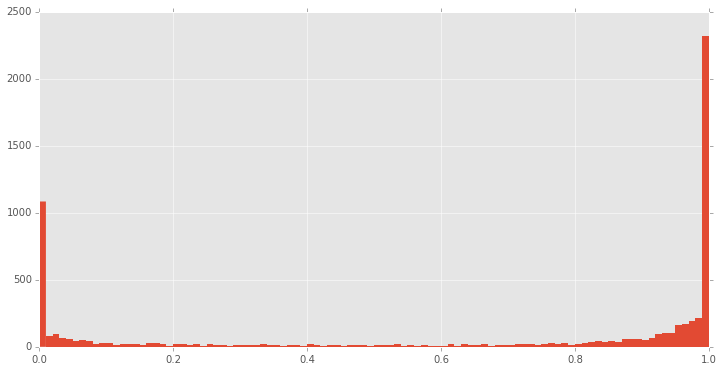

In [6]:
plt.figure(figsize=(12,6))
dump=plt.hist(reg_psi,bins=100,edgecolor='none')

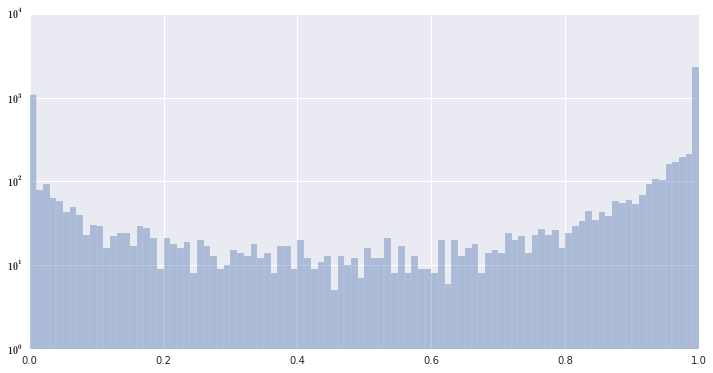

In [11]:
import seaborn as sns
plt.figure(figsize=(12,6))
dump=sns.distplot(reg_psi,bins=100,kde=False)
plt.yscale('log')

(0, 200)

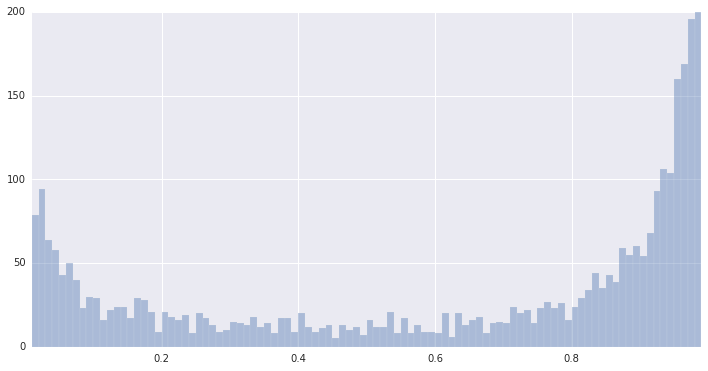

In [12]:
plt.figure(figsize=(12,6))
dump=sns.distplot(reg_psi,bins=100,kde=False)
dump=plt.xlim(0.01,0.99)
plt.ylim(0,200)

### All

In [13]:
fs_map=pd.read_csv(
    '/nagyvinyok/adat84/sotejedlik/ribli/expression/data/brca_rnaseq/FILE_SAMPLE_MAP.txt',sep='\t')
fs_map=fs_map.iloc[:-1,:]
fs_dict={}
for i in xrange(len(fs_map)):
    fs_dict[fs_map.iloc[i,0]]=fs_map.iloc[i,1]
    
    
tum_dict={}
for i in xrange(len(fs_map)):
    if ( fs_map.iloc[i,1].split('-')[3][0]=='0'):
        tum_dict[fs_map.iloc[i,0]]='tumor'
    else:
        tum_dict[fs_map.iloc[i,0]]='normal'

### Load all normal

In [14]:
import gc
import os
from glob import glob
df_list,tum_list,norm_list=[],[],[]
gene_df=pd.DataFrame()
i=0
for filename in glob(datadir+'*junction_quantification.txt'):
    fname=os.path.basename(filename)
    
    #df_list.append(tmp_df[['RPKM']])
    if tum_dict[fname]=='tumor':
        'nothing'
        #tum_list.append(tmp_df[['RPKM']])
    else:
        tmp_df=pd.read_csv(filename, sep='\t',header=0)
        gene_df=tmp_df.junction
        norm_list.append(tmp_df[['raw_counts']])
        
    print '.',
    i+=1
    if i%100==0:
        print i,
    gc.collect()

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 100 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 200 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 300 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 400 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [15]:
#data_matrix=pd.concat([gene_df]+df_list,axis=1)
n_data_matrix=pd.concat([gene_df]+norm_list,axis=1)
#t_data_matrix=pd.concat([gene_df]+tum_list,axis=1)

In [21]:
data=pd.concat([gene_df]+[n_data_matrix.drop('junction',axis=1).sum(axis=1)],axis=1)

In [23]:
data['chr1']=[x.split(',')[0].split(':')[0] for x in data.junction]
data['chr2']=[x.split(',')[1].split(':')[0] for x in data.junction]

data['pos1']=[int(x.split(',')[0].split(':')[1]) for x in data.junction]
data['pos2']=[int(x.split(',')[1].split(':')[1]) for x in data.junction]

data['strand1']=[x.split(',')[0].split(':')[2] for x in data.junction]
data['strand2']=[x.split(',')[1].split(':')[2] for x in data.junction]


data=data[data.chr1==data.chr2]
data['chr']=data.chr1
data.drop(['chr1','chr2'],axis=1,inplace=True)

data=data[data.strand1==data.strand2]
data['strand']=data.strand1
data.drop(['strand1','strand2'],axis=1,inplace=True)

data.drop('junction',axis=1,inplace=True)

data.head()

,0,pos1,pos2,chr,strand
0,0,12227,12595,chr1,+
1,3,12227,12613,chr1,+
2,0,12227,12646,chr1,+
3,2,12697,13221,chr1,+
4,0,12721,13221,chr1,+


In [24]:
jctrip=pd.concat([data[:-2],data[1:-1].reset_index(drop=True),data[2:].reset_index(drop=True)],axis=1,ignore_index=True)

cass=jctrip[ (jctrip[1]==jctrip[6]) & (jctrip[7]==jctrip[12]) ].reset_index(drop=True)

cass.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,6463,14829,14970,chr1,-,40,14829,15796,chr1,-,1693,15038,15796,chr1,-
1,0,17055,17259,chr1,-,1745,17055,17606,chr1,-,12855,17368,17606,chr1,-
2,12855,17368,17606,chr1,-,30,17368,17915,chr1,-,13253,17742,17915,chr1,-
3,3579,787490,788051,chr1,+,469,787490,788771,chr1,+,5062,788146,788771,chr1,+
4,397,908390,908566,chr1,+,8,908390,908880,chr1,+,265,908706,908880,chr1,+


In [25]:
#mapping control
cass_filt=cass[cass[0]+cass[5]+cass[10] > 20]

n_inc= cass_filt[0]+cass_filt[10]
n_exc= cass_filt[5]
psi=0.5* n_inc /(0.5 * n_inc + n_exc)

reg_psi=psi.values[~np.isnan(psi.values) & (psi.values!=np.inf)]

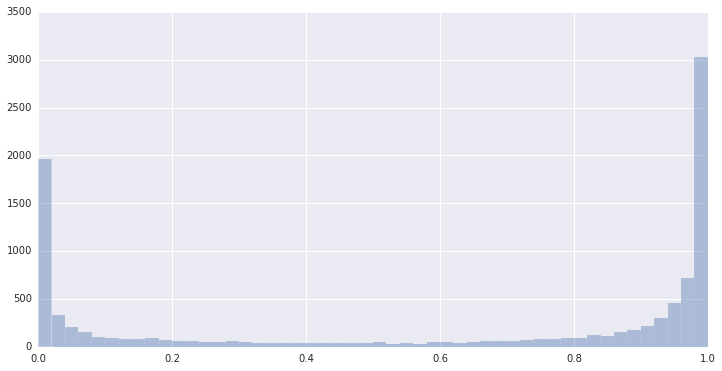

In [38]:
plt.figure(figsize=(12,6))
dump=sns.distplot(reg_psi,bins=50,kde=False)

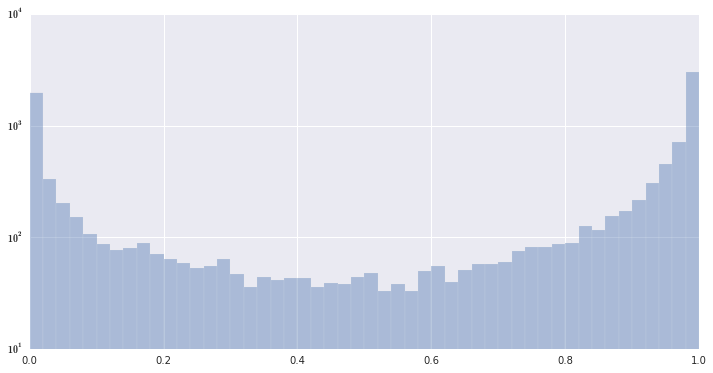

In [37]:
plt.figure(figsize=(12,6))
dump=sns.distplot(reg_psi,bins=50,kde=False)
plt.yscale('log')

(0, 600)

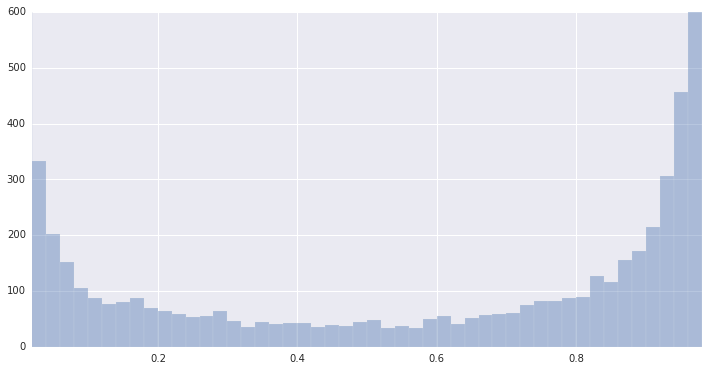

In [43]:
plt.figure(figsize=(12,6))
dump=sns.distplot(reg_psi,bins=50,kde=False)
dump=plt.xlim(0.02,0.98)
plt.ylim(0,600)